### Installing OSMNX

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


### Importing the OSMNX and Networkx package.

In [2]:
import numpy as np
import osmnx as ox
import networkx as nx

### Extracting the network of a specified area.

Create a GeoDataFrame of OSM features within the boundaries of a specified place.



In [3]:
# Define the place you want to extract
place_name1 = "Quezon City, Philippines"

# Download the network graph for the specified place
G1 = ox.graph_from_place(place_name1, network_type='all')

Create a GeoDataFrame of OSM features within the boundaries of a specified address.



In [4]:
# Define the place you want to extract
place_name2 = "University of the Philippines Diliman, Quezon City , Philippines"

# Download the network graph for the specified place
G2 = ox.graph_from_address(place_name2, network_type='all')

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


### Visualize street networks and geospatial features.

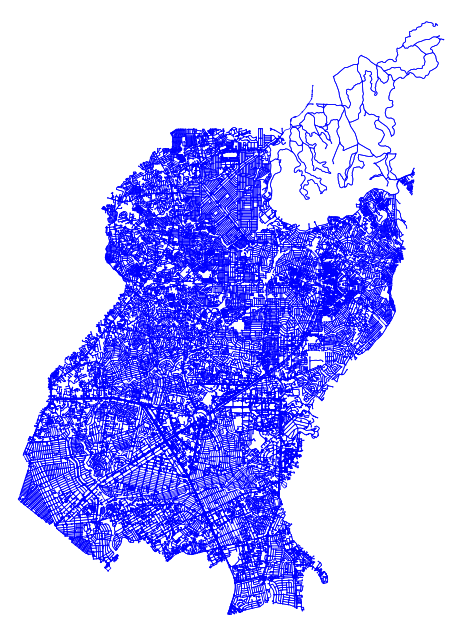

In [5]:
# Plot the graph
fig, ax = ox.plot_graph(G1, bgcolor="white", edge_linewidth=0.5, edge_color = "blue", node_size=1, node_color="blue")

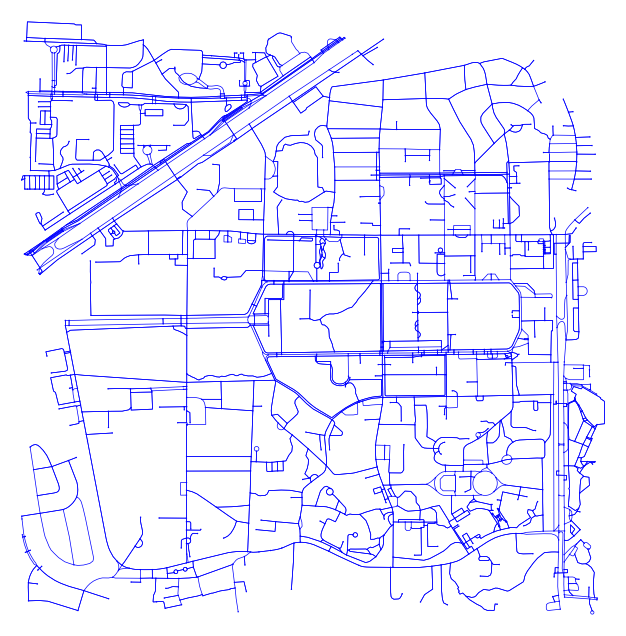

In [7]:
# Plot the graph
fig, ax = ox.plot_graph(G2, bgcolor="white", edge_linewidth=0.5, edge_color = "blue", node_size=1, node_color="blue")


### Note: The network_type parameter can be adjusted depending on the network type you need.

In [8]:
place_name2 = "University of the Philippines Diliman, Quezon City , Philippines"


# Download the network graph for the specified place
G4 = ox.graph_from_place(place_name2, network_type='walk')

In [9]:
place_name2 = "University of the Philippines Diliman, Quezon City , Philippines"

# Download the network graph for the specified place
G5 = ox.graph_from_place(place_name2, network_type='bike')

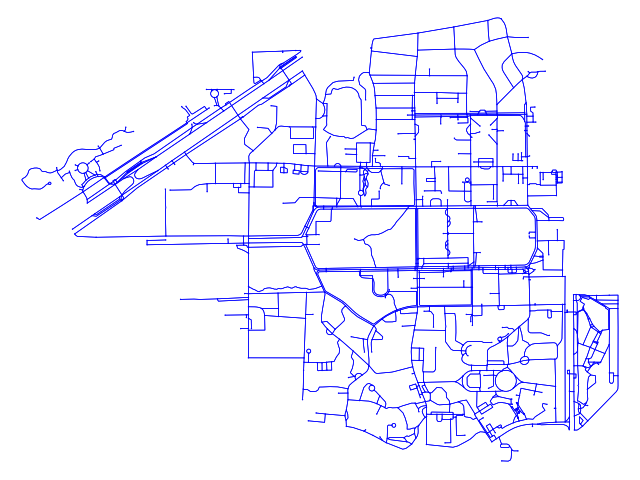

In [11]:
# Plot the graph
fig, ax = ox.plot_graph(G4, bgcolor="white", edge_linewidth=0.5, edge_color = "blue", node_size=1, node_color="blue")

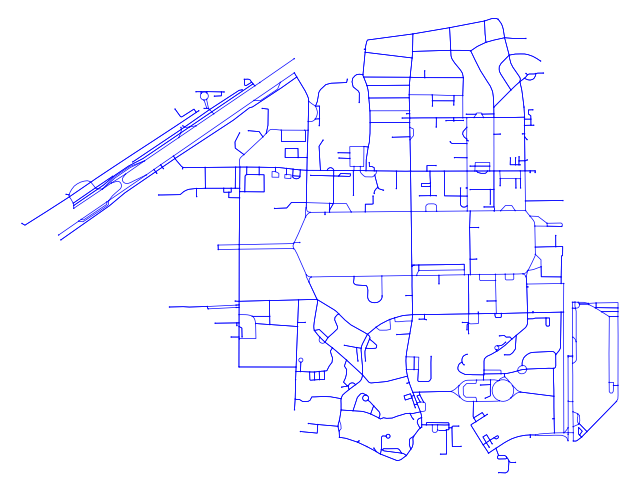

In [12]:
# Plot the graph
fig, ax = ox.plot_graph(G5, bgcolor="white", edge_linewidth=0.5, edge_color = "blue", node_size=1, node_color="blue")

### Output the number of nodes and edges in the network graph for the specified area.

In [23]:
# Print the number of nodes and edges
num_nodes1 = len(G2.nodes)
num_edges1 = len(G2.edges)

print("-- 'all' network_type --")
print(f"Number of nodes: {num_nodes1}")
print(f"Number of edges: {num_edges1}")

num_nodes4 = len(G4.nodes)
num_edges4 = len(G4.edges)

print("-- 'bike' network_type --")
print(f"Number of nodes: {num_nodes4}")
print(f"Number of edges: {num_edges4}")


num_nodes5 = len(G5.nodes)
num_edges5 = len(G5.edges)

print("-- 'walk' network_type --")
print(f"Number of nodes: {num_nodes5}")
print(f"Number of edges: {num_edges5}")

-- 'all' network_type --
Number of nodes: 1690
Number of edges: 4212
-- 'bike' network_type --
Number of nodes: 1131
Number of edges: 3158
-- 'walk' network_type --
Number of nodes: 645
Number of edges: 1423


### Plot a specific point on a network graph

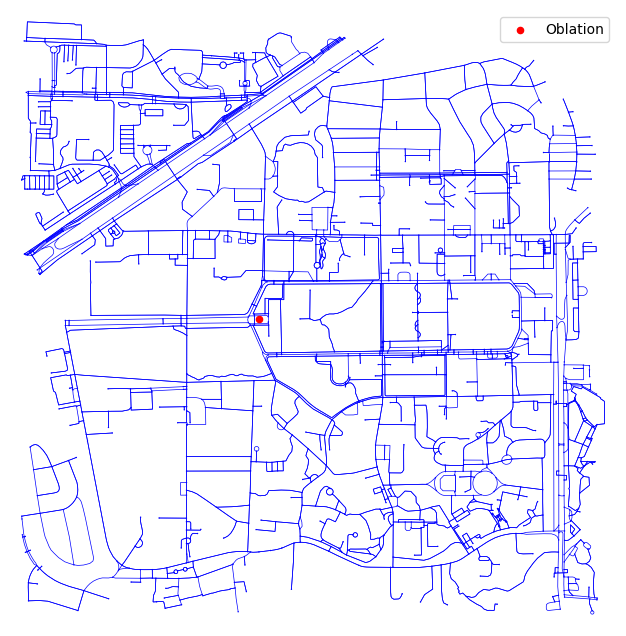

In [15]:
import matplotlib.pyplot as plt

# Define the coordinate of the point/s to locate
lat = [14.654927]
lon = [121.064642]

# Plot the graph
fig, ax = ox.plot_graph(G2, bgcolor="white", show=False, close=False, edge_linewidth=0.5, edge_color="blue", node_size=1, node_color="blue")
ax.scatter(lon, lat, color='red', marker='o', s=20, label='Oblation')

# Add a legend
ax.legend()
# Show the plot
plt.show()

### Retrieve and print amenities or facilities of specified types from a place.

In [16]:
# Specify the amenity types
amenity_types = ['restaurant', 'bus_station', 'bank', 'pharmacy']

# Get all amenities within the graph for the specified amenity types
gdf = ox.geometries_from_place(place_name2, tags={'amenity': amenity_types})

print(gdf[['amenity', 'geometry']])

<ipython-input-16-0595572f1808>:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name2, tags={'amenity': amenity_types})


                            amenity  \
element_type osmid                    
node         997425024     pharmacy   
             1097926412        bank   
             1097926417        bank   
             1097926430  restaurant   
             1404245381        bank   
...                             ...   
way          608098285   restaurant   
             614136085         bank   
             1173958143  restaurant   
             1304746075  restaurant   
             1304746102  restaurant   

                                                                  geometry  
element_type osmid                                                          
node         997425024                          POINT (121.07125 14.65991)  
             1097926412                         POINT (121.05611 14.65700)  
             1097926417                         POINT (121.05608 14.65695)  
             1097926430                         POINT (121.05589 14.65740)  
             1404245381       

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


### Compute the shortest distance between two points on a road network.


*   Find the nearest nodes
*   Compute the shortest path



### Find the nearest nodes.

In [17]:
# Define the coordinates of the two points
point1 = (14.654927, 121.064642)  # (latitude, longitude)
point2 = (14.649531, 121.070763)  # (latitude, longitude)

# Find the nearest network nodes to the given points
nearest_node1 = ox.distance.nearest_nodes(G2, point1[1], point1[0])
nearest_node2 = ox.distance.nearest_nodes(G2, point2[1], point2[0])

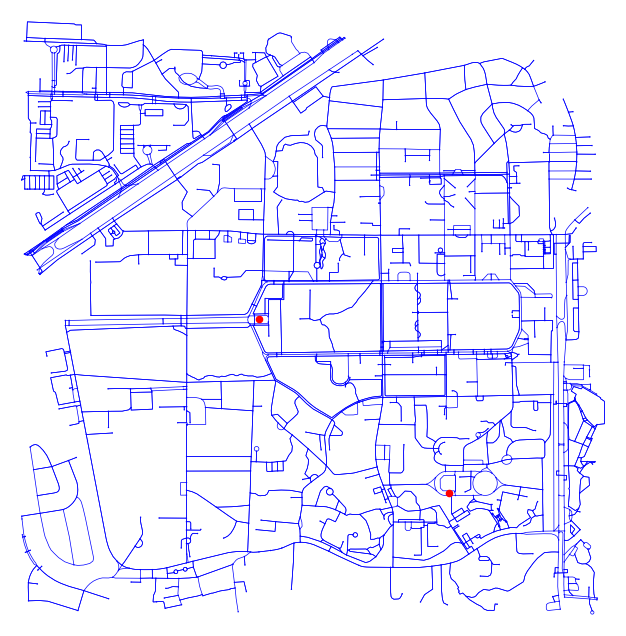

In [18]:
# Define the coordinate of the point to locate
x1 = [14.654927, 14.649531]   # latitudes
y1 = [121.064642, 121.070763] #longitudes

# Plot the graph
fig, ax = ox.plot_graph(G2, bgcolor="white", show=False, close=False, edge_linewidth=0.5, edge_color="blue", node_size=1, node_color="blue")
ax.scatter(y1, x1, color='red', marker='o', s=20, label='Point')

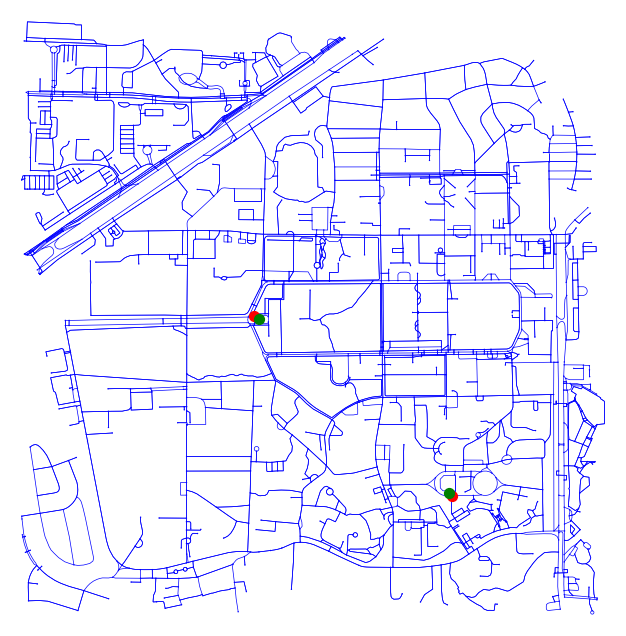

In [19]:
# Get the coordinates of the nearest nodes
coords_node1 = (G2.nodes[nearest_node1]['y'], G2.nodes[nearest_node1]['x'])
coords_node2 = (G2.nodes[nearest_node2]['y'], G2.nodes[nearest_node2]['x'])

fig, ax = ox.plot_graph(G2, bgcolor="white", show=False, close=False, edge_linewidth=0.5, edge_color="blue", node_size=1, node_color="blue")
ax.scatter([coords_node1[1], coords_node2[1]], [coords_node1[0], coords_node2[0]], color='red', marker='o', s=50, label='Nearest Nodes')
ax.scatter(y1, x1, color='green', marker='o', s=50, label='Input Nodes')

In [20]:
# Compute the shortest path distance between the two points
shortest_distance = nx.shortest_path_length(G2, source=nearest_node1, target=nearest_node2, weight='length')
print(f"The shortest distance between the two points is {shortest_distance:.2f} meters.")

The shortest distance between the two points is 1145.07 meters.


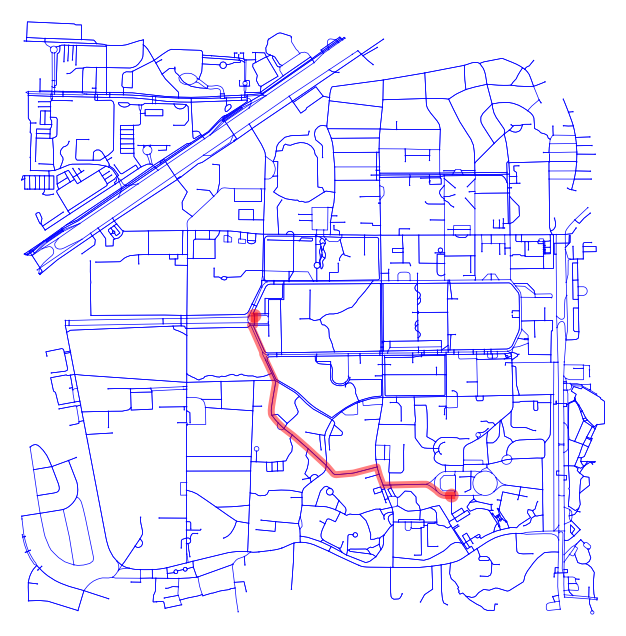

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [28]:
# Compute the shortest path distance between the two points
shortest_path = nx.shortest_path(G2, source=nearest_node1, target=nearest_node2, weight='length')
ox.plot_graph_route(G2, shortest_path, route_linewidth=5, route_color='red', bgcolor="white", edge_linewidth=0.5, edge_color="blue", node_size=1, node_color="blue", show=True)

The shortest distance between the two points in a 'walk' network type is 1148.67 meters.
The shortest distance between the two points in a 'bike' network type is 1156.62 meters.


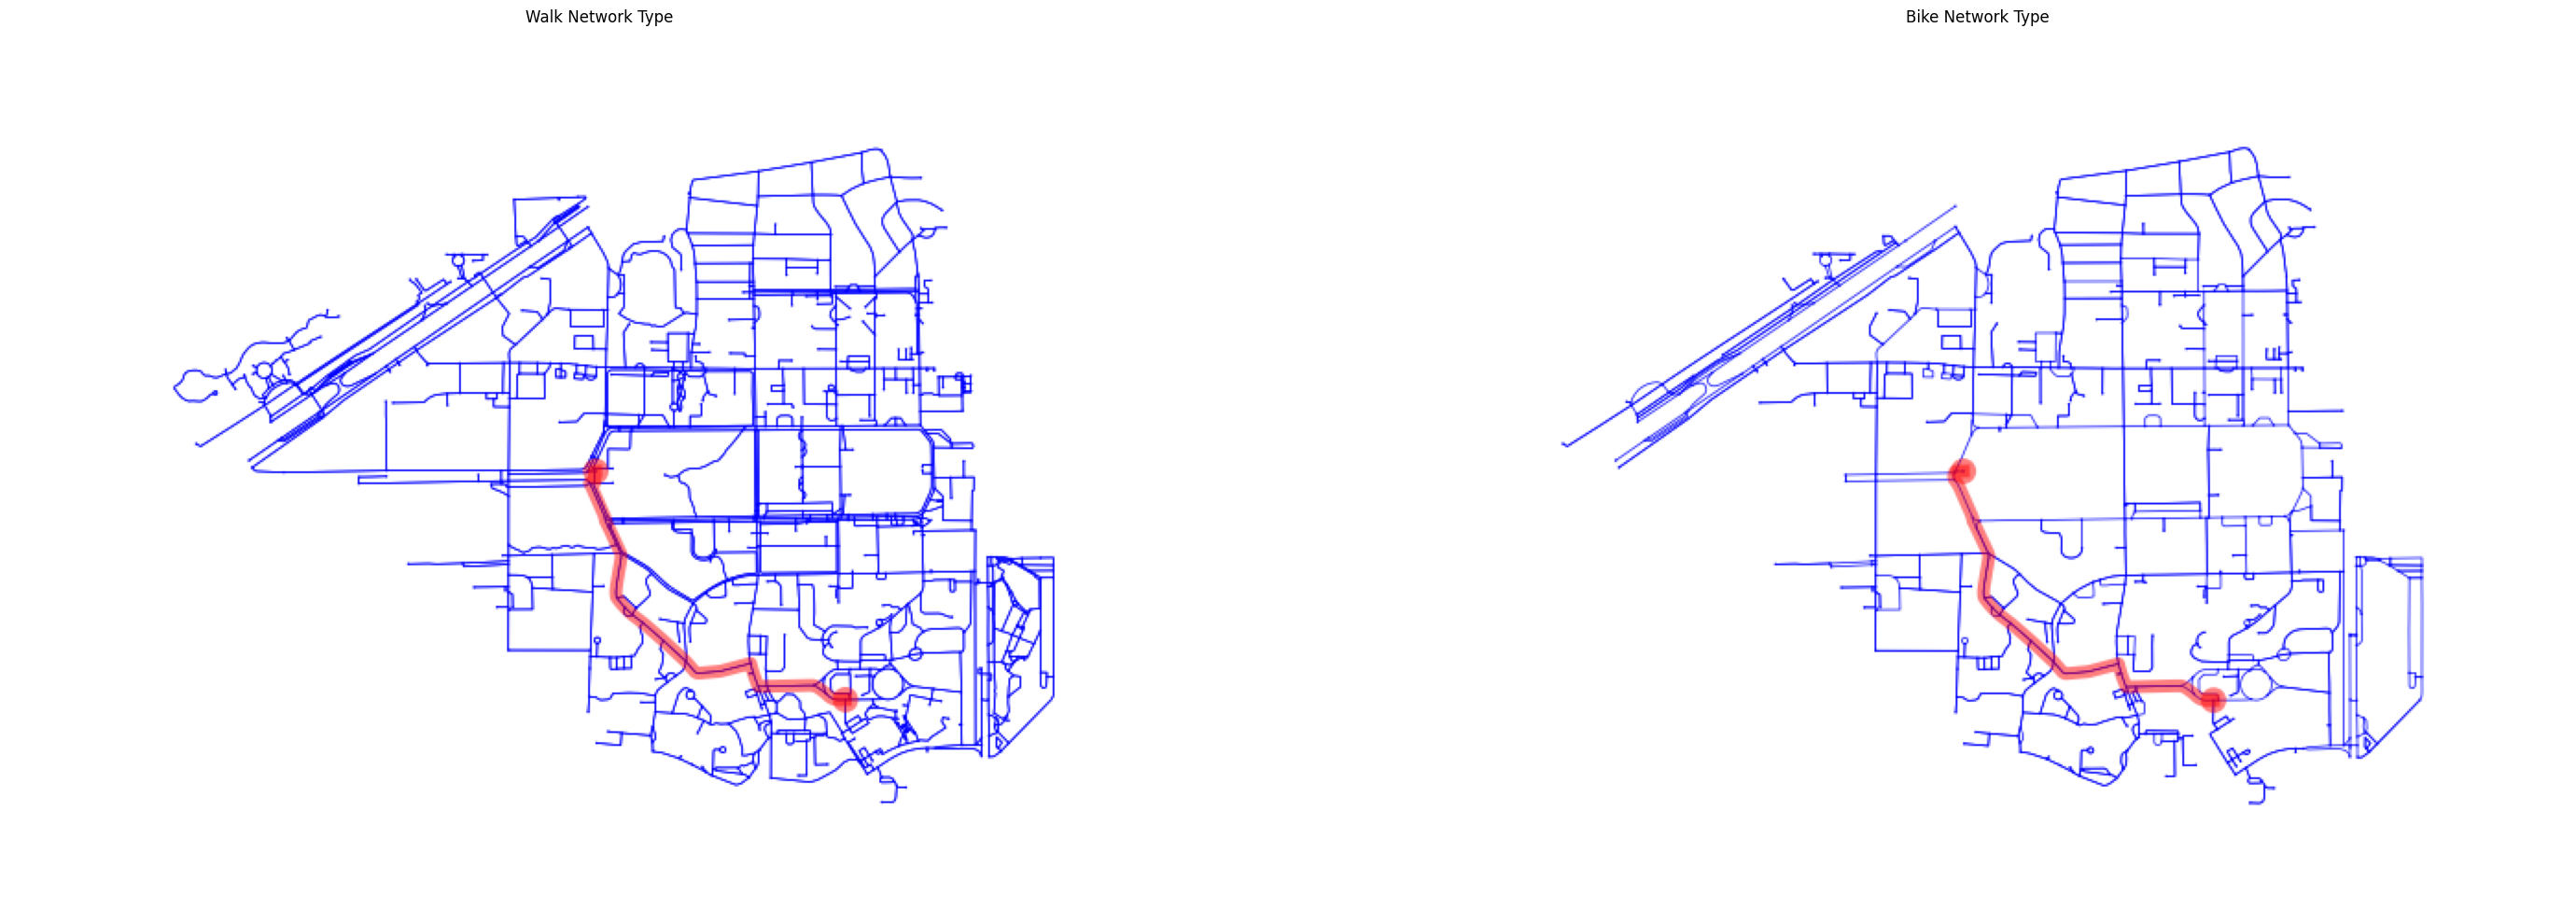

In [31]:
# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

# 'Walk' Network Type
nearest_node_4_1 = ox.distance.nearest_nodes(G4, point1[1], point1[0])
nearest_node_4_2 = ox.distance.nearest_nodes(G4, point2[1], point2[0])
shortest_path4 = nx.shortest_path(G4, source=nearest_node_4_1, target=nearest_node_4_2, weight='length')
shortest_distance = nx.shortest_path_length(G4, source=nearest_node_4_1, target=nearest_node_4_2, weight='length')
print(f"The shortest distance between the two points in a 'walk' network type is {shortest_distance:.2f} meters.")
fig1, ax1 = plt.subplots()
ox.plot_graph(G4, bgcolor="white", edge_linewidth=0.5, edge_color="blue", node_size=1, node_color="blue", ax=ax1, show=False)
ox.plot_graph_route(G4, shortest_path4, route_linewidth=5, route_color='red', ax=ax1, show=False)
axs[0].imshow(fig1.canvas.buffer_rgba())
axs[0].set_title('Walk Network Type')
axs[0].axis('off')

# 'Bike' Network Type
nearest_node_5_1 = ox.distance.nearest_nodes(G5, point1[1], point1[0])
nearest_node_5_2 = ox.distance.nearest_nodes(G5, point2[1], point2[0])
shortest_path5 = nx.shortest_path(G5, source=nearest_node_5_1, target=nearest_node_5_2, weight='length')
shortest_distance = nx.shortest_path_length(G5, source=nearest_node_5_1, target=nearest_node_5_2, weight='length')
print(f"The shortest distance between the two points in a 'bike' network type is {shortest_distance:.2f} meters.")

fig2, ax2 = plt.subplots()
ox.plot_graph(G5, bgcolor="white", edge_linewidth=0.5, edge_color="blue", node_size=1, node_color="blue", ax=ax2, show=False)
ox.plot_graph_route(G5, shortest_path5, route_linewidth=5, route_color='red', ax=ax2, show=False)
axs[1].imshow(fig2.canvas.buffer_rgba())
axs[1].set_title('Bike Network Type')
axs[1].axis('off')

plt.tight_layout()
plt.show()